# EDA and Feature Engineering

In [2]:

# dataset - https://github.com/aditya1876/AlgerianFirePrediction.git



## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)

## Read data

In [4]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [5]:
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


## Data pre-processing

In [6]:
#size of dataset
#---------------
len(df.index)

247

In [7]:
# the independent features are set as the index of the dataframe.

#get column headers
cols=[]
for row in df.head(1).index:
    for col in row:
        cols.append(str(col).strip())
print(cols)
cols.append('Classes') #append the final column to the column list
print(cols)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']


In [8]:
df=df.reset_index() #reset the index of the dataframe
df

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,Bejaia Region Dataset
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [9]:
#Remove the first row as it is not needed.
df.drop([0], axis=0, inplace=True)
df

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,Bejaia Region Dataset
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [10]:
#add columns to the dataset
df.columns = cols
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [11]:
# Convert the whole dataframe as a string and display
display(df.to_string())

'                               day  month  year  Temperature   RH   Ws   Rain  FFMC   DMC      DC   ISI   BUI      FWI        Classes\n1                               01     06  2012           29   57   18      0  65.7   3.4     7.6   1.3   3.4      0.5    not fire   \n2                               02     06  2012           29   61   13    1.3  64.4   4.1     7.6     1   3.9      0.4    not fire   \n3                               03     06  2012           26   82   22   13.1  47.1   2.5     7.1   0.3   2.7      0.1    not fire   \n4                               04     06  2012           25   89   13    2.5  28.6   1.3     6.9     0   1.7        0    not fire   \n5                               05     06  2012           27   77   16      0  64.8     3    14.2   1.2   3.9      0.5    not fire   \n6                               06     06  2012           31   67   14      0  82.6   5.8    22.2   3.1     7      2.5        fire   \n7                               07     06  2012       

In [12]:
# Converts the dataframe into str object with formatting
print(df.to_markdown())

|     | day                           | month   | year   | Temperature   | RH   | Ws   | Rain   | FFMC   | DMC   | DC     | ISI   | BUI   | FWI   | Classes   |
|----:|:------------------------------|:--------|:-------|:--------------|:-----|:-----|:-------|:-------|:------|:-------|:------|:------|:------|:----------|
|   1 | 01                            | 06      | 2012   | 29            | 57   | 18   | 0      | 65.7   | 3.4   | 7.6    | 1.3   | 3.4   | 0.5   | not fire  |
|   2 | 02                            | 06      | 2012   | 29            | 61   | 13   | 1.3    | 64.4   | 4.1   | 7.6    | 1     | 3.9   | 0.4   | not fire  |
|   3 | 03                            | 06      | 2012   | 26            | 82   | 22   | 13.1   | 47.1   | 2.5   | 7.1    | 0.3   | 2.7   | 0.1   | not fire  |
|   4 | 04                            | 06      | 2012   | 25            | 89   | 13   | 2.5    | 28.6   | 1.3   | 6.9    | 0     | 1.7   | 0     | not fire  |
|   5 | 05                            | 

In [13]:
#categorical features

for feature in df.columns:
    print(f'The {feature} has {len(df[feature].unique())} unique values')

The day has 33 unique values
The month has 6 unique values
The year has 3 unique values
The Temperature has 21 unique values
The RH has 64 unique values
The Ws has 20 unique values
The Rain has 41 unique values
The FFMC has 175 unique values
The DMC has 168 unique values
The DC has 200 unique values
The ISI has 108 unique values
The BUI has 176 unique values
The FWI has 129 unique values
The Classes has 10 unique values


#### Inferences
* Looking at the data, it looks like Index 123 and 124 are junk values and should be removed.
* Row no 168 has incorrect data under DC('14.6 9' instead of 14.6), ISI,BUI,FWI,Classes. The values should be shifted by 1 columns
* Column year has only 1 value in the dataset. It can be dropped.
* Column 'day' does not matter for fire or not fire. it can be dropped. Otherwise higher values of days may impact model learning.
* Convert all Numerical columns as int or float.
* Column 'Classes' have 8 unique values. However on manual inspection, there are only 2 unique values, 'fire' and 'not fire'. Update the values and use Label encoding.
* Looking at the correlation matrix, we can see that BUI and (DMC, DC) are very strongly correlated. We can drop BUI column from X_train as it has high number of outliers. Also month and classes do not have much impact on temperature or any other class, so it can be dropped too.


**Looking at the data, it looks like Index 123 and 124 are junk values and should be removed.**

In [14]:
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [15]:
df.drop([123,124], axis=0, inplace=True) #123 and 124 are index values to be dropped
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
125,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


**Row no 168 has incorrect data under DC('14.6 9' instead of 14.6), ISI,BUI,FWI,Classes. The values should be shifted by 1 columns**

In [16]:
df.loc[168]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Name: 168, dtype: object

In [17]:
#replace the values in the row by shifting by 1 value from column DC onwards
#replace cell values using loc
df.loc[168,'DC']=14.6
df.loc[168,'ISI']=9
df.loc[168,'BUI']=12.5
df.loc[168,'FWI']=10.4
df.loc[168,'Classes']='fire'
df.loc[168]

day              14
month            07
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
Classes        fire
Name: 168, dtype: object

In [18]:
#missing values
df.isnull().sum()


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

**Column year has only 1 value in the dataset. It can be dropped.**

In [19]:
df.drop(['year'], axis=1, inplace=True)
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


**Column 'day' does not matter for fire or not fire. it can be dropped. Otherwise higher values of days may impact model learning.**

In [20]:
df.drop(['day'], axis=1, inplace=True)
df

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...
242,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


**Convert all Numerical columns as int or float.**

In [21]:
df['month']=df['month'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['FWI']=df['FWI'].astype(float)
df

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...
242,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
243,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
244,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [22]:
df.dtypes

month            int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

**Column 'Classes' have 8 unique values. However on manual inspection, there are only 2 unique values, 'fire' and 'not fire'. Update the values and use Label encoding.**

In [23]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [24]:
df['Classes']=df['Classes'].map({'not fire   ':'not_fire', 'fire   ':'fire', 'fire':'fire', 'fire ':'fire',
                                 'not fire':'not_fire', 'not fire ':'not_fire','not fire     ':'not_fire',
                                 'not fire    ':'not_fire'})

In [25]:
df['Classes'].unique()

array(['not_fire', 'fire'], dtype=object)

In [26]:
#label incoding
df['Classes']=df['Classes'].map({'not_fire':0, 'fire':1})
df['Classes']

1      0
2      0
3      0
4      0
5      0
      ..
242    1
243    0
244    0
245    0
246    0
Name: Classes, Length: 244, dtype: int64

In [27]:
# Scale data if variance is high


df.describe()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574
std,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700
min,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000
75%,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


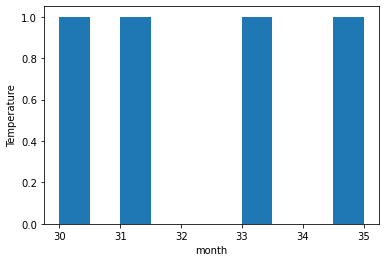

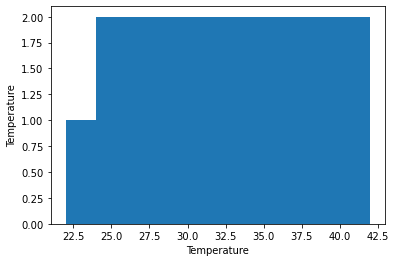

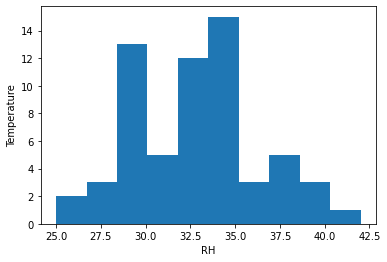

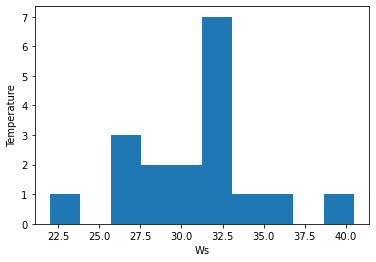

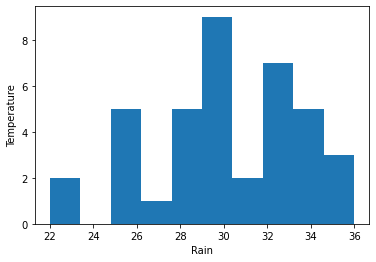

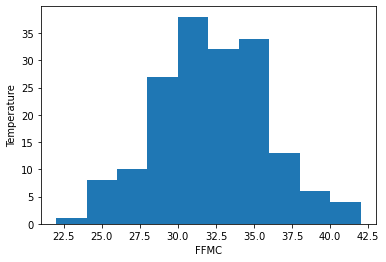

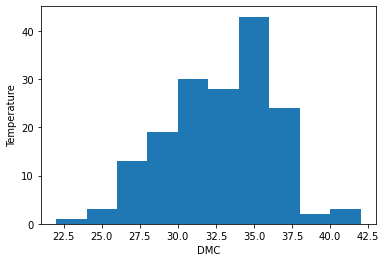

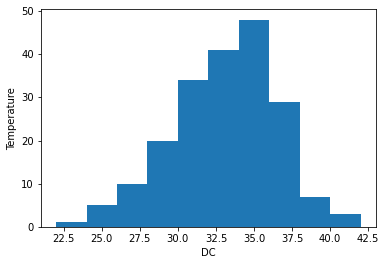

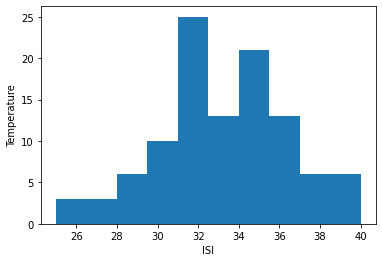

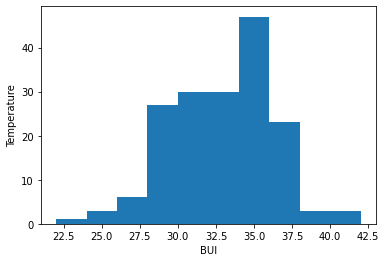

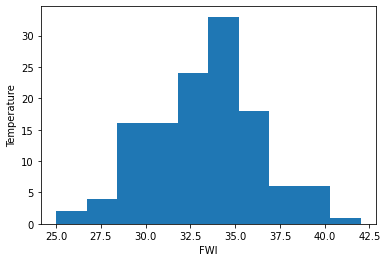

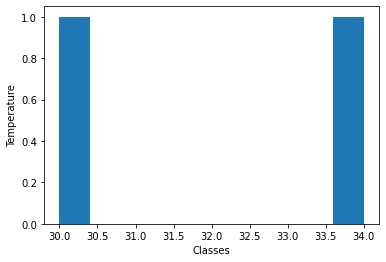

In [28]:
#graphs show Month column has very little influence on Temperature.
data=df.copy()
for feature in df.columns:
    data.groupby(feature)['Temperature'].median().plot.hist() #histogram is better for cont. feature
    plt.xlabel(feature)
    plt.ylabel('Temperature')
    plt.show()

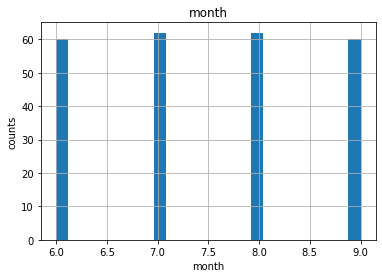

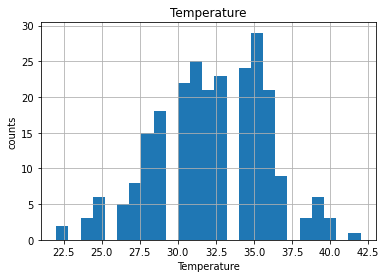

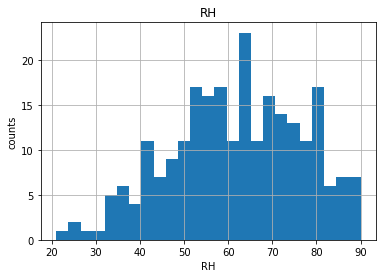

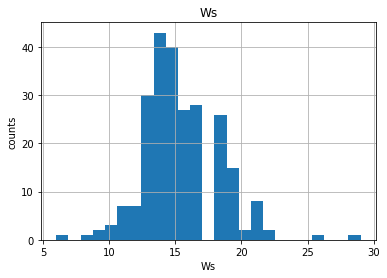

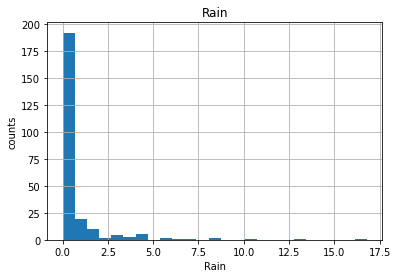

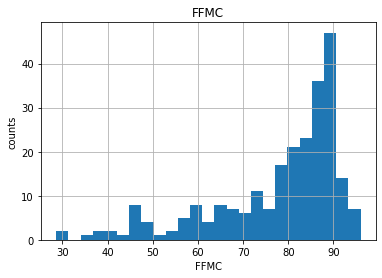

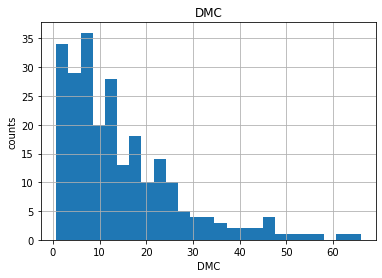

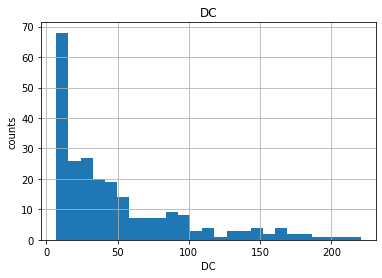

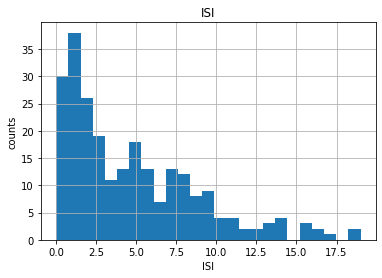

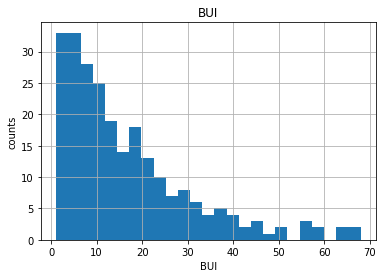

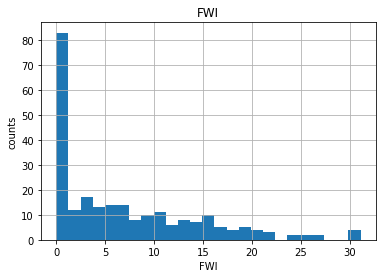

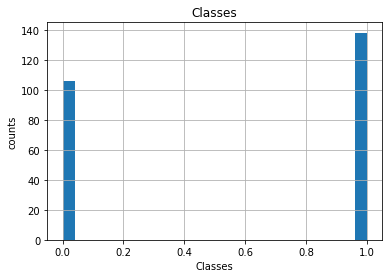

In [29]:
#graphs show that the columns('Rain','FFMC','DMC','DC','ISI','BUI','FWI') are not in normal distribution.
# They should be converted to log normal distribution.
data=df.copy()
#distribution of column data
for feature in df.columns:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("counts")
    plt.title(feature)
    plt.show()

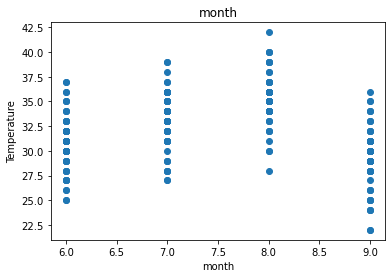

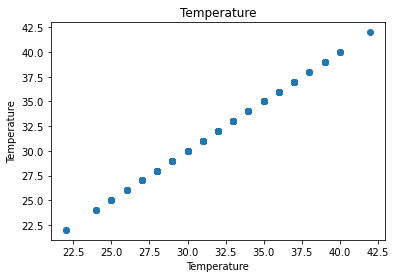

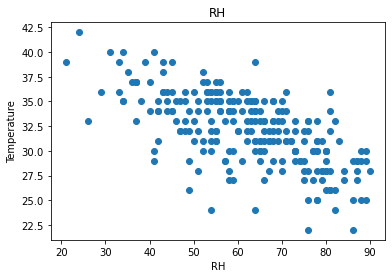

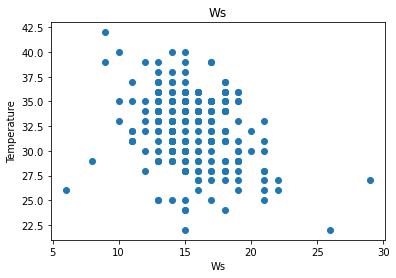

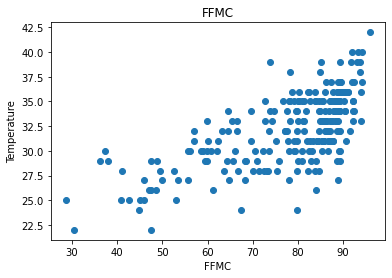

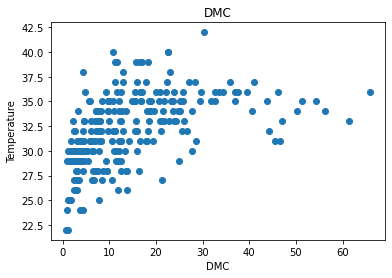

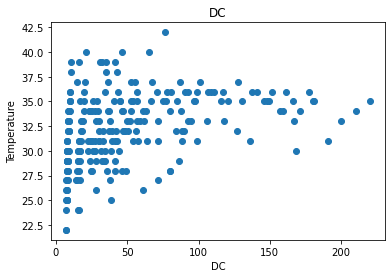

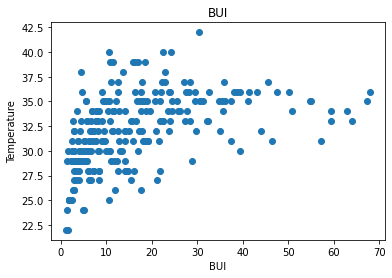

In [30]:
#Convert distribution to log normal
data=df.copy()
for feature in df.columns:
    if 0 in df[feature].unique():
        pass #ignore 0 data in column as log 0 is undefined
    else:
        data[feature]=np.log(df[feature])
        
        plt.scatter(df[feature],df['Temperature'])
        plt.xlabel(feature)
        plt.ylabel('Temperature')
        plt.title(feature)
        plt.show()

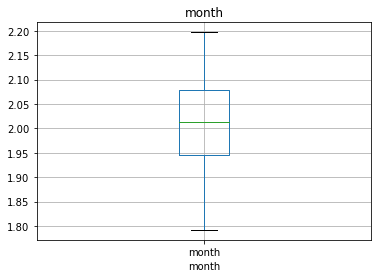

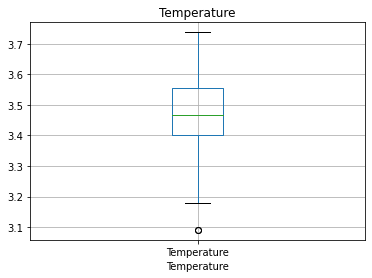

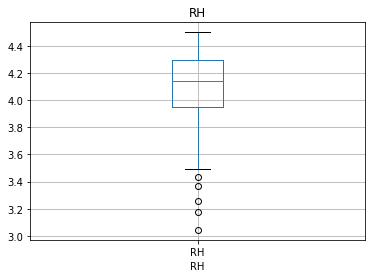

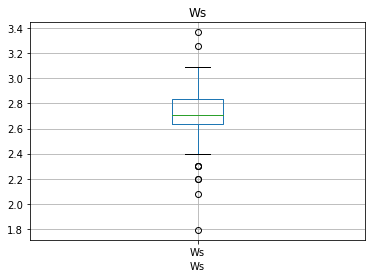

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


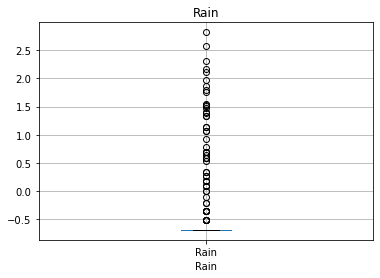

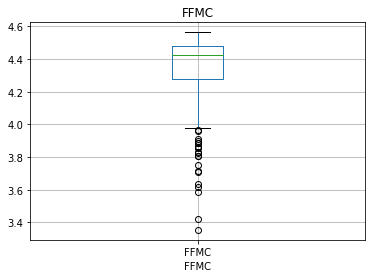

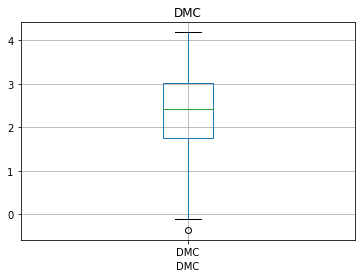

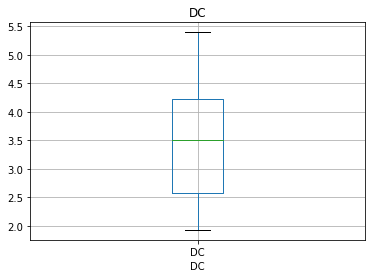

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


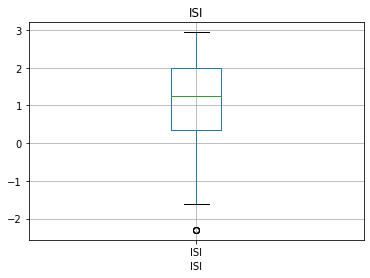

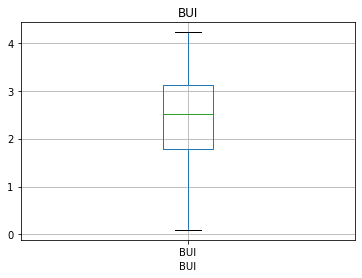

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


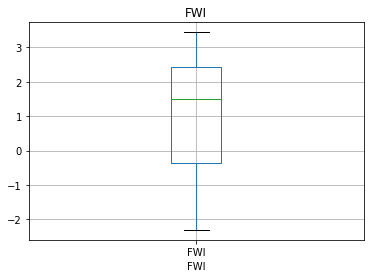

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


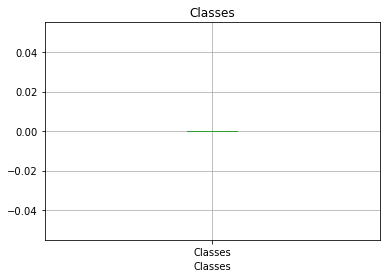

In [31]:
#outliers
data=df.copy()
for feature in df.columns:
    data[feature]=np.log(data[feature])

    data.boxplot(column=feature)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

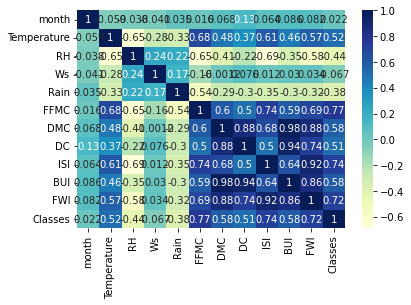

In [32]:
# Multicolinearity
# plotting correlation heatmap
data=df.copy()
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()


**Looking at the correlation matrix, we can see that BUI and (DMC, DC) are very strongly correlated. We can drop BUI column from X_train as it has high number of outliers. Also month and classes do not have much impact on temperature or any other class, so it can be dropped too**

In [33]:
df.drop(['BUI', 'month'],axis=1, inplace=True)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes
1,29,57,18,0.0,65.7,3.4,7.6,1.3,0.5,0
2,29,61,13,1.3,64.4,4.1,7.6,1.0,0.4,0
3,26,82,22,13.1,47.1,2.5,7.1,0.3,0.1,0
4,25,89,13,2.5,28.6,1.3,6.9,0.0,0.0,0
5,27,77,16,0.0,64.8,3.0,14.2,1.2,0.5,0
...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0.0,85.4,16.0,44.5,4.5,6.5,1
243,28,87,15,4.4,41.1,6.5,8.0,0.1,0.0,0
244,27,87,29,0.5,45.9,3.5,7.9,0.4,0.2,0
245,24,54,18,0.1,79.7,4.3,15.2,1.7,0.7,0


### Test Train Split for Regression Model

In [34]:
# get x, y for regression
X_reg=df.drop(['Temperature'], axis=1)
y_reg=df['Temperature']

# do train test split
from sklearn.model_selection import train_test_split
X_reg_train,X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg,y_reg,test_size=0.2) 
#split 80-20% train-test

### Test Train split for Classification Model

In [35]:
# get x, y for Classification
X_cla=df.drop(['Classes'], axis=1)
y_cla=df['Classes']

# do train test split
from sklearn.model_selection import train_test_split
X_cla_train,X_cla_test, y_cla_train, y_cla_test = train_test_split(X_cla,y_cla,test_size=0.2) 
#split 80-20% train-test

## Model Training and Selection

### Regression Model

In [43]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import pickle

models={LinearRegression():{'param':{'fit_intercept':[True,False], 'normalize':[True,False]},
                              'scoring':'neg_mean_squared_error'},
        Ridge():{'param':{'alpha':[1e-15,1e-8,1e-2,1,20,50,100]},
                   'scoring':'neg_mean_squared_error'},
        Lasso():{'param':{'alpha':[1e-15,1e-8,1e-2,1,20,50,100]},
                'scoring':'neg_mean_squared_error'},
        ElasticNet():{'param':{'alpha':[1e-15,1e-8,1e-2,1,20,50,100],'l1_ratio':[1e-15,1e-2,1,5,100]},
                               'scoring':'neg_mean_squared_error'},
        SVR():{'param':{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']},
              'scoring':'neg_mean_squared_error'},
        DecisionTreeRegressor():{'param':{ 'max_depth': [5, 10, None],'max_features': ['auto', 'log2'], 'min_samples_split':[2,3]},
                                'scoring':'neg_mean_squared_error'},
        RandomForestRegressor():{'param':{ 'bootstrap': [True], 'max_depth': [5, 10, None],
                                          'max_features': ['auto', 'log2'], 'n_estimators': [5, 10, 11, 15]},
                                'scoring':'neg_mean_squared_error'}
        
       }

results={}

for m in models.keys():
    
    ##hyperparameter tuning
    reg_model=GridSearchCV(m, models[m]['param'], scoring=models[m]['scoring'], cv=5)
    
    #model training
    reg_model.fit(X_reg_train,y_reg_train)
    
    #prediction
    model_pred = reg_model.predict(X_reg_test)
    
    # measure performance Regression
    reg_model_mse=mean_squared_error(y_reg_test,model_pred)
    reg_model_r2=r2_score(y_reg_test,model_pred)
        
    #store results
    results[m]=[reg_model.best_params_, reg_model.best_score_, reg_model_mse, reg_model_r2]
    
    #save model as pickle
    filename = str(m)[:-2]+'_model.sav'
    pickle.dump(reg_model, open('./SavedModels/'+filename, 'wb'))

    #Reading from pickle
    #import pickle
    #loaded_model = pickle.load(open(filename, 'rb'))

for i in results.keys():
    print(f'Model:{i}--best_param:{results[i][0]}--best_trainingScore:{results[i][1]}--model_mse:{results[i][2]}--modelR2:{results[i][3]}')

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.165e+02, tolerance: 2.023e-01
  model = cd_fast.enet_coordinate_descent(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.090e+02, tolerance: 1.964e-01
  model = cd_fast.enet_coordinate_descent(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.144e+02, tolerance: 1.940e-01
  model = cd_fast.enet_coordinate_descent(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.165e+02, tolerance: 2.023e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.292e+01, tolerance: 1.964e-01
  model = cd_fast.enet_coordinate_descent(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.540e+01, tolerance: 1.940e-01
  model = cd_fast.enet_coordinate_descent(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 175.
The score on these train-test partitions for these parameters will be set 

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

Model:LinearRegression()--best_param:{'fit_intercept': True, 'normalize': True}--best_trainingScore:-6.217038497890363--model_mse:7.109076740069803--modelR2:0.50647969545748
Model:Ridge()--best_param:{'alpha': 100}--best_trainingScore:-6.159508429940228--model_mse:6.0369079346820085--modelR2:0.5809108902107354
Model:Lasso()--best_param:{'alpha': 1}--best_trainingScore:-6.19442484873999--model_mse:5.842929098841966--modelR2:0.5943771246654842
Model:ElasticNet()--best_param:{'alpha': 1, 'l1_ratio': 1e-15}--best_trainingScore:-6.153501995508812--model_mse:5.906018515933451--modelR2:0.5899973845846234
Model:SVR()--best_param:{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}--best_trainingScore:-6.073226505360505--model_mse:4.103580884998849--modelR2:0.7151246832567444
Model:DecisionTreeRegressor()--best_param:{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 3}--best_trainingScore:-9.619078309132053--model_mse:8.944847694045906--modelR2:0.3790383590642392
Model:RandomForestRegressor(

### Based on R2 score, DecisionTreeRegressor() is the best model

### Classification Model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score


models={LogisticRegression():{'param':{'C':[0.5,1,2,3,4,5], 'penalty':['l1','l2','elasticnet']},
                              'scoring':'accuracy'},
        SVC():{'param':{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']},
              'scoring':'accuracy'},
        BernoulliNB():{'param':{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
                      'scoring':'accuracy'},
        DecisionTreeClassifier():{'param':{ 'max_depth': [5, 10, None],'max_features': ['auto', 'log2'], 'min_samples_split':[2,3]},
                                'scoring':'accuracy'},
        RandomForestClassifier():{'param':{ 'bootstrap': [True], 'max_depth': [5, 10, None],
                                          'max_features': ['auto', 'log2'], 'n_estimators': [5, 10, 11, 15]},
                                'scoring':'accuracy'}        
        
       }

results={}

for m in models.keys():
    
    ##hyperparameter tuning
    cla_model=GridSearchCV(m, models[m]['param'], scoring=models[m]['scoring'], cv=5)
    
    #model training
    cla_model.fit(X_cla_train,y_cla_train)
    
    #prediction
    model_pred = cla_model.predict(X_cla_test)
    
    # measure performance Regression
    cla_model_cm= confusion_matrix(y_cla_test,model_pred)
    cla_model_f1=f1_score(y_cla_test,model_pred)
        
    #store results
    results[m]=[cla_model.best_params_, cla_model.best_score_, cla_model_cm, cla_model_f1]
    
    #save model as pickle
    filename = str(m)[:-2]+'_model.sav'
    pickle.dump(reg_model, open('./SavedModels/'+filename, 'wb'))

    #Reading from pickle
    #import pickle
    #loaded_model = pickle.load(open(filename, 'rb'))

for i in results.keys():
    print(f'Model:{i}--best_param:{results[i][0]}--best_trainingScore:{results[i][1]}--model_confusionMat:{results[i][2]}--modelf1:{results[i][3]}')

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_

/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Model:LogisticRegression()--best_param:{'C': 3, 'penalty': 'l2'}--best_trainingScore:0.9794871794871796--model_confusionMat:[[18  1]
 [ 0 30]]--modelf1:0.9836065573770492
Model:SVC()--best_param:{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}--best_trainingScore:0.9692307692307693--model_confusionMat:[[19  0]
 [ 1 29]]--modelf1:0.983050847457627
Model:BernoulliNB()--best_param:{'alpha': 0.01}--best_trainingScore:0.8358974358974359--model_confusionMat:[[14  5]
 [ 5 25]]--modelf1:0.8333333333333334
Model:DecisionTreeClassifier()--best_param:{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 3}--best_trainingScore:0.9743589743589745--model_confusionMat:[[19  0]
 [ 0 30]]--modelf1:1.0
Model:RandomForestClassifier()--best_param:{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 11}--best_trainingScore:0.9846153846153847--model_confusionMat:[[19  0]
 [ 0 30]]--modelf1:1.0


/home/adi01/anaconda3/envs/proj_algfire/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


### Highest F1 score is for RandomForestClassifer.